In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [9]:
df = pd.read_csv(r"C:\Users\Hewlett Packard\Downloads\country_wise_latest .csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [8]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [10]:
print(df.columns)


Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')


In [11]:
ranking = df[['Country/Region','Confirmed','Deaths','Recovered','Active']].sort_values(by="Confirmed", ascending=False)
ranking.head(20)


,Country/Region,Confirmed,Deaths,Recovered,Active
173,US,4290259,148011,1325804,2816444
23,Brazil,2442375,87618,1846641,508116
79,India,1480073,33408,951166,495499
138,Russia,816680,13334,602249,201097
154,South Africa,452529,7067,274925,170537
111,Mexico,395489,44022,303810,47657
132,Peru,389717,18418,272547,98752
35,Chile,347923,9187,319954,18782
177,United Kingdom,301708,45844,1437,254427
81,Iran,293606,15912,255144,22550


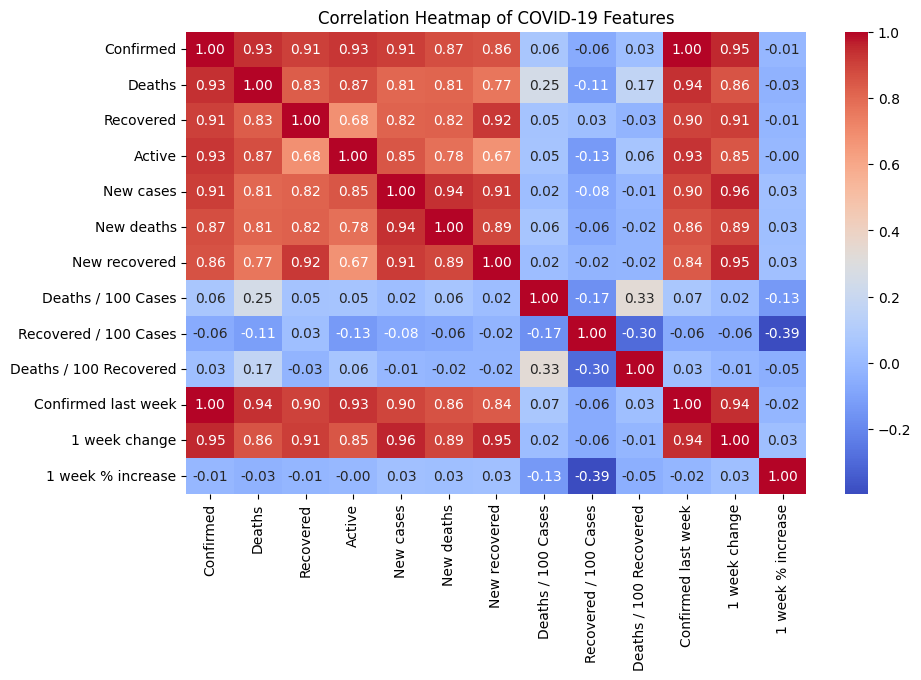

In [12]:
# Select only numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of COVID-19 Features")
plt.show()


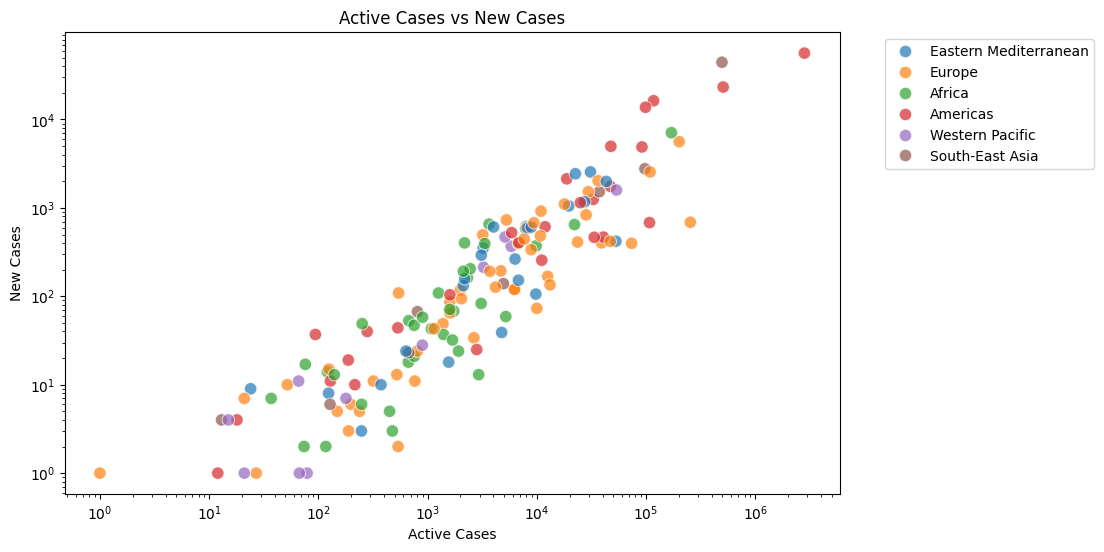

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Active', y='New cases', hue='WHO Region', alpha=0.7, s=80)
plt.title("Active Cases vs New Cases")
plt.xlabel("Active Cases")
plt.ylabel("New Cases")
plt.xscale("log")   # optional: to handle big differences in scale
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [17]:
region_cfr = df.groupby('WHO Region')['Deaths / 100 Cases'].mean().reset_index()
fig = px.bar(region_cfr, x='WHO Region', y='Deaths / 100 Cases',
             title="Average Case Fatality Ratio by Region", color='WHO Region')
fig.show()


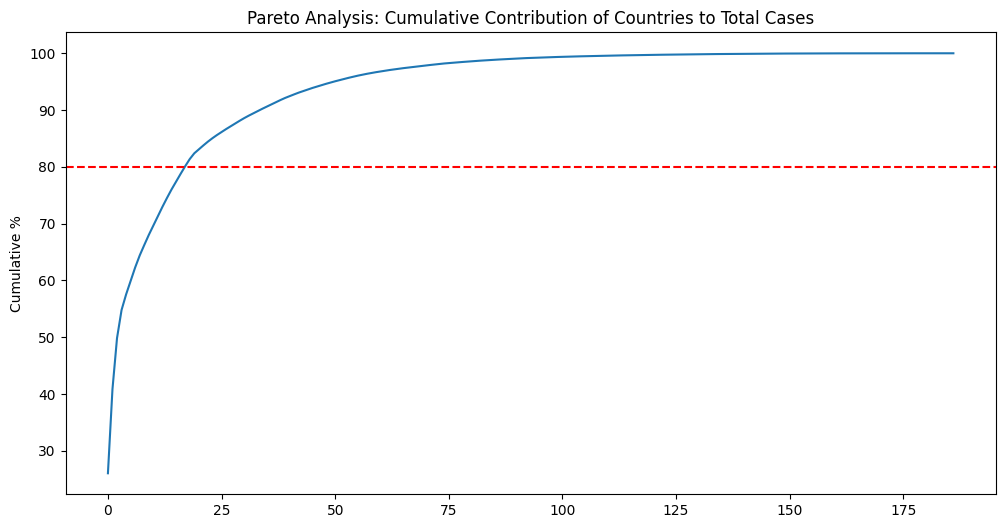

In [18]:
df_sorted = df.sort_values(by="Confirmed", ascending=False)
df_sorted['Cumulative %'] = df_sorted['Confirmed'].cumsum()/df_sorted['Confirmed'].sum()*100

plt.figure(figsize=(12,6))
sns.lineplot(x=range(len(df_sorted)), y=df_sorted['Cumulative %'])
plt.axhline(80, color='r', linestyle="--")
plt.title("Pareto Analysis: Cumulative Contribution of Countries to Total Cases")
plt.show()


C:\Users\Hewlett Packard\AppData\Local\Temp\ipykernel_12792\2655494116.py:1: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



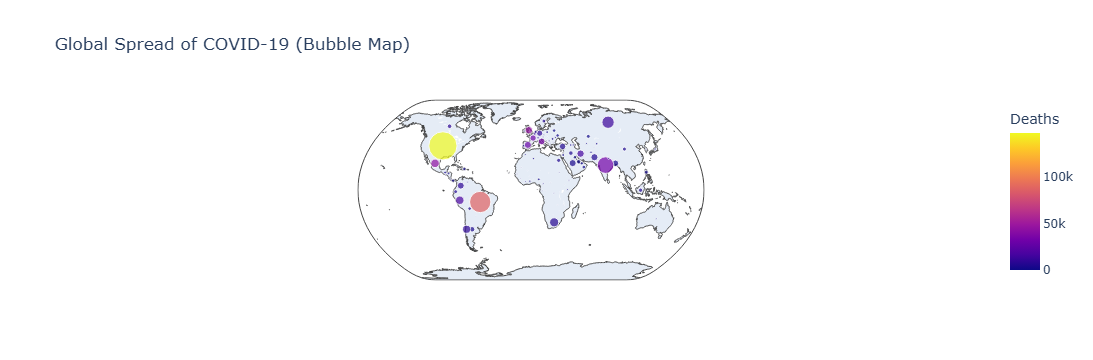

In [19]:
fig = px.scatter_geo(df, locations="Country/Region", locationmode="country names",
                     size="Confirmed", color="Deaths",
                     hover_name="Country/Region",
                     projection="natural earth",
                     title="Global Spread of COVID-19 (Bubble Map)")
fig.show()


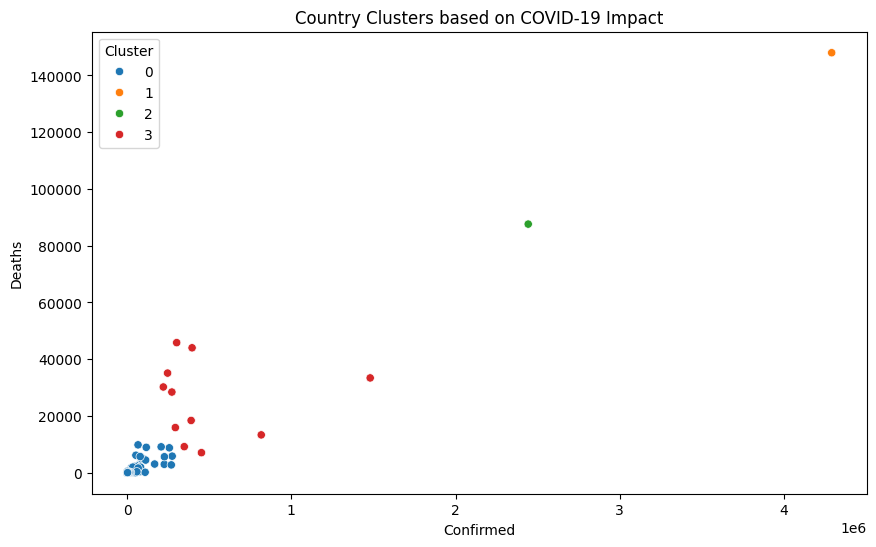

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = df[['Confirmed','Deaths','Recovered','Active']]
scaled = StandardScaler().fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x='Confirmed', y='Deaths', hue='Cluster', data=df, palette="tab10")
plt.title("Country Clusters based on COVID-19 Impact")
plt.show()


In [23]:
outliers = df[(df['Deaths / 100 Cases'] > 10) | (df['Recovered / 100 Cases'] < 20)]
outliers[['Country/Region','Confirmed','Deaths / 100 Cases','Recovered / 100 Cases']]


,Country/Region,Confirmed,Deaths / 100 Cases,Recovered / 100 Cases
16,Belgium,66428,14.79,26.27
22,Botswana,739,0.27,8.53
32,Canada,116458,7.68,0.00
61,France,220352,13.71,36.86
76,Honduras,39741,2.93,12.68
77,Hungary,4448,13.40,74.84
85,Italy,246286,14.26,80.64
111,Mexico,395489,11.13,76.82
117,Mozambique,1701,0.65,0.00
118,Namibia,1843,0.43,5.48
